In [2]:
import pandas as pd
df = pd.read_csv("/Users/rajeshgudikoti/Documents/rajesh/learning/nlp/LDA_Topic_modelling/comcast_consumeraffairs_complaints.csv")
#df = pd.read_csv("/Users/rajeshgudikoti/Documents/rajesh/learning/data_sets/airline/Tweets_negative.csv")
df.head(5)
#df.airline.unique()

,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...


In [117]:
#data=df['airline_sentiment']
#data[:5]

In [120]:
dict={}

In [121]:
combined_text_va=''
data=df.loc[(df['airline_sentiment'] == 'negative') & (df['airline'] == 'Virgin America')]
combined_text_va = data['text'].str.cat(sep='.')
combined_text_va

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse.@VirginAmerica and it\'s a really big bad thing about it.@VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA.@VirginAmerica SFO-PDX schedule is still MIA..@VirginAmerica  I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP!.@VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select???.@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet.@VirginAmerica status match program.  I applied and it\'s been three weeks.  Called and emailed with no response..@VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be abl

In [122]:
combined_text_united=''
data=df.loc[(df['airline_sentiment'] == 'negative') & (df['airline'] == 'United')]
combined_text_united = data['text'].str.cat(sep='.')
#combined_text_united

In [123]:
combined_text_southwest=''
data=df.loc[(df['airline_sentiment'] == 'negative') & (df['airline'] == 'Southwest')]
combined_text_southwest = data['text'].str.cat(sep='.')
#combined_text_southwest

In [124]:
combined_text_delta=''
data=df.loc[(df['airline_sentiment'] == 'negative') & (df['airline'] == 'Delta')]
combined_text_delta = data['text'].str.cat(sep='.')
#combined_text_delta

In [125]:
combined_text_usairways=''
data=df.loc[(df['airline_sentiment'] == 'negative') & (df['airline'] == 'US Airways')]
combined_text_usairways = data['text'].str.cat(sep='.')
#combined_text_usairways

In [126]:
dict['virginamerica'] = combined_text_va
dict['united'] = combined_text_united
dict['southwest'] = combined_text_southwest
dict['delta'] = combined_text_delta
dict['usairways'] = combined_text_usairways


In [52]:
#if 'combined_text_delta' in dict: del dict['combined_text_delta']

In [127]:
dict.keys()

dict_keys(['virginamerica', 'united', 'southwest', 'delta', 'usairways'])

In [128]:
dict.values()

dict_values(['@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse.@VirginAmerica and it\'s a really big bad thing about it.@VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA.@VirginAmerica SFO-PDX schedule is still MIA..@VirginAmerica  I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP!.@VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select???.@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet.@VirginAmerica status match program.  I applied and it\'s been three weeks.  Called and emailed with no response..@VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I 

In [129]:
#print (df['text'].apply(' '.join).reset_index())
#df[text].head(2)

In [130]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [131]:
dict_clean = {k: clean_text_round1(v) for k, v in dict.items()}
dict_clean.values()
#print(type(dict_clean))

dict_values(['virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recoursevirginamerica and its a really big bad thing about itvirginamerica seriously would pay  a flight for seats that didnt have this playing\nits really the only bad thing about flying vavirginamerica sfopdx schedule is still miavirginamerica  i flew from nyc to sfo last week and couldnt fully sit in my seat due to two large gentleman on either side of me helpvirginamerica why are your first fares in may over three times more than other carriers when all seats are available to selectvirginamerica you guys messed up my seating i reserved seating with my friends and you guys gave my seat away  😡 i want free internetvirginamerica status match program  i applied and its been three weeks  called and emailed with no responsevirginamerica what happened  ur vegan food options at least say on ur site so i know i wont be able  eat anything for next  hrs failvirginameric

In [217]:
# Let's take a look at the updated text
#data_clean= pd.DataFrame(data.text.apply(round1))
#data_clean = clean_text_round1(dict.values())
#data_clean.head(5)

In [132]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [133]:
dict_clean = {k: clean_text_round2(v) for k, v in dict_clean.items()}
dict_clean.values()
#print(type(dict_clean))

dict_values(['virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recoursevirginamerica and its a really big bad thing about itvirginamerica seriously would pay  a flight for seats that didnt have this playingits really the only bad thing about flying vavirginamerica sfopdx schedule is still miavirginamerica  i flew from nyc to sfo last week and couldnt fully sit in my seat due to two large gentleman on either side of me helpvirginamerica why are your first fares in may over three times more than other carriers when all seats are available to selectvirginamerica you guys messed up my seating i reserved seating with my friends and you guys gave my seat away  😡 i want free internetvirginamerica status match program  i applied and its been three weeks  called and emailed with no responsevirginamerica what happened  ur vegan food options at least say on ur site so i know i wont be able  eat anything for next  hrs failvirginamerica 

In [198]:
# Let's take a look at the updated text
#data_clean = pd.DataFrame(data_clean.text.apply(round2))
#data_clean.head(5)

In [134]:
dict_clean.keys()

dict_keys(['virginamerica', 'united', 'southwest', 'delta', 'usairways'])

In [135]:
import pickle
pickle_out = open("pickle/dict_clean.pickle","wb")
pickle.dump(dict_clean, pickle_out)
pickle_out.close()

In [136]:
df_clean = pd.DataFrame.from_dict(dict_clean, orient='index')
df_clean.columns = ['reviews']
#df_clean = data_df.sort_index()
#pd.DataFrame(index=index, columns=columns)
df_clean

,reviews
virginamerica,virginamerica its really aggressive to blast o...
united,united still no refund or word via dm please r...
southwest,southwestair still waiting just hit one hourso...
delta,jetblue they werent on any flight they just ca...
usairways,usairways is there a better time to call my f...


In [137]:
df_clean['reviews']

virginamerica    virginamerica its really aggressive to blast o...
united           united still no refund or word via dm please r...
southwest        southwestair still waiting just hit one hourso...
delta            jetblue they werent on any flight they just ca...
usairways        usairways  is there a better time to call my f...
Name: reviews, dtype: object

In [69]:
# ******* Not Required ********** #
#new_df_clean = pd.DataFrame()
#new_df_clean = df_clean['reviews'] ## --> this gives series
new_df_clean = df_clean[['reviews']] ## --> this gives dataframe
print(type(df_clean['reviews']),type(df_clean[['reviews']]))
new_df_clean

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


,reviews
virginamerica,virginamerica its really aggressive to blast o...
united,united still no refund or word via dm please r...
southwest,southwestair still waiting just hit one hourso...
delta,jetblue they werent on any flight they just ca...
usairways,usairways is there a better time to call my f...


In [138]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_clean.reviews)
#print(data_cv.toarray()[[0]]) ### 7484 columns(number of occurence unique words)
#print(cv.get_feature_names()) ### unique words
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df_clean.index
print(df_clean.index)
data_dtm

Index(['virginamerica', 'united', 'southwest', 'delta', 'usairways'], dtype='object')


,aa,aaaand,aadvantage,aal,aampc,aarp,aaunited,aaus,aausairways,aback,...,zippers,zipusairways,zkatcher,zombie,zone,zones,zoom,zrh,zukes,zurich
virginamerica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
united,2,1,0,0,1,0,1,0,0,1,...,0,0,0,0,2,1,0,1,1,2
southwest,0,0,0,0,0,2,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
delta,1,0,0,0,0,0,0,0,0,0,...,0,0,3,1,0,0,0,0,0,0
usairways,16,0,2,1,0,0,0,1,2,0,...,0,1,0,0,2,0,0,0,0,0


In [139]:
# Let's pickle it for later use
data_dtm.to_pickle("pickle/dtm.pkl")

In [140]:
pickle_out = open("pickle/df_clean.pkl","wb")
pickle.dump(df_clean, pickle_out)
pickle_out.close()

In [141]:
# We will transpose Document Term matrix 
data = pd.read_pickle('pickle/dtm.pkl')
data = data.transpose()
data.head()

,virginamerica,united,southwest,delta,usairways
aa,0,2,0,1,16
aaaand,0,1,0,0,0
aadvantage,0,0,0,0,2
aal,0,0,0,0,1
aampc,0,1,0,0,0


In [143]:
# Find the top 30 words said by people
top_dict = {}
#print(data['ali'].sort_values(ascending=False),'\n*********')
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    print(top,' **** \n')
    top_dict[c]= list(zip(top.index, top.values))

top_dict

flight               59
website              19
cancelled            18
im                   17
site                 16
virginamerica        16
seat                 15
just                 14
trying               14
check                14
flights              13
book                 10
helpvirginamerica     9
like                  8
time                  8
jfk                   8
phone                 8
email                 8
problems              8
luggage               7
guys                  7
amp                   7
status                7
broken                7
dont                  7
bag                   7
plane                 7
today                 7
flying                6
lax                   6
Name: virginamerica, dtype: int64  **** 

flight       729
united       256
service      197
just         180
customer     175
time         174
im           171
delayed      171
cancelled    171
plane        155
bag          148
gate         134
amp          130
hours        127


{'virginamerica': [('flight', 59),
  ('website', 19),
  ('cancelled', 18),
  ('im', 17),
  ('site', 16),
  ('virginamerica', 16),
  ('seat', 15),
  ('just', 14),
  ('trying', 14),
  ('check', 14),
  ('flights', 13),
  ('book', 10),
  ('helpvirginamerica', 9),
  ('like', 8),
  ('time', 8),
  ('jfk', 8),
  ('phone', 8),
  ('email', 8),
  ('problems', 8),
  ('luggage', 7),
  ('guys', 7),
  ('amp', 7),
  ('status', 7),
  ('broken', 7),
  ('dont', 7),
  ('bag', 7),
  ('plane', 7),
  ('today', 7),
  ('flying', 6),
  ('lax', 6)],
 'united': [('flight', 729),
  ('united', 256),
  ('service', 197),
  ('just', 180),
  ('customer', 175),
  ('time', 174),
  ('im', 171),
  ('delayed', 171),
  ('cancelled', 171),
  ('plane', 155),
  ('bag', 148),
  ('gate', 134),
  ('amp', 130),
  ('hours', 127),
  ('late', 123),
  ('dont', 120),
  ('flights', 109),
  ('hour', 106),
  ('like', 98),
  ('waiting', 94),
  ('help', 87),
  ('bags', 86),
  ('delay', 86),
  ('thanks', 85),
  ('airline', 85),
  ('lost', 78)

In [144]:
# Look at the most common top words 
from collections import Counter

# Let's first pull out the top 30 words for each airline
words = []
for review in data.columns:
    top = [word for (word, count) in top_dict[review]]
    print('***\n',top)
    for t in top:
        words.append(t)
        
words

***
 ['flight', 'website', 'cancelled', 'im', 'site', 'virginamerica', 'seat', 'just', 'trying', 'check', 'flights', 'book', 'helpvirginamerica', 'like', 'time', 'jfk', 'phone', 'email', 'problems', 'luggage', 'guys', 'amp', 'status', 'broken', 'dont', 'bag', 'plane', 'today', 'flying', 'lax']
***
 ['flight', 'united', 'service', 'just', 'customer', 'time', 'im', 'delayed', 'cancelled', 'plane', 'bag', 'gate', 'amp', 'hours', 'late', 'dont', 'flights', 'hour', 'like', 'waiting', 'help', 'bags', 'delay', 'thanks', 'airline', 'lost', 'worst', 'flightled', 'need', 'people']
***
 ['flight', 'cancelled', 'hold', 'flightled', 'customer', 'hours', 'service', 'just', 'flights', 'im', 'amp', 'time', 'southwestair', 'hour', 'phone', 'help', 'got', 'need', 'delayed', 'dont', 'ive', 'flighted', 'minutes', 'today', 'like', 'late', 'trying', 'helpsouthwestair', 'plane', 'fly']
***
 ['flight', 'jetblue', 'just', 'delayed', 'plane', 'jfk', 'im', 'time', 'delay', 'amp', 'dont', 'cancelled', 'hours', 's

['flight',
 'website',
 'cancelled',
 'im',
 'site',
 'virginamerica',
 'seat',
 'just',
 'trying',
 'check',
 'flights',
 'book',
 'helpvirginamerica',
 'like',
 'time',
 'jfk',
 'phone',
 'email',
 'problems',
 'luggage',
 'guys',
 'amp',
 'status',
 'broken',
 'dont',
 'bag',
 'plane',
 'today',
 'flying',
 'lax',
 'flight',
 'united',
 'service',
 'just',
 'customer',
 'time',
 'im',
 'delayed',
 'cancelled',
 'plane',
 'bag',
 'gate',
 'amp',
 'hours',
 'late',
 'dont',
 'flights',
 'hour',
 'like',
 'waiting',
 'help',
 'bags',
 'delay',
 'thanks',
 'airline',
 'lost',
 'worst',
 'flightled',
 'need',
 'people',
 'flight',
 'cancelled',
 'hold',
 'flightled',
 'customer',
 'hours',
 'service',
 'just',
 'flights',
 'im',
 'amp',
 'time',
 'southwestair',
 'hour',
 'phone',
 'help',
 'got',
 'need',
 'delayed',
 'dont',
 'ive',
 'flighted',
 'minutes',
 'today',
 'like',
 'late',
 'trying',
 'helpsouthwestair',
 'plane',
 'fly',
 'flight',
 'jetblue',
 'just',
 'delayed',
 'plane'

In [145]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('flight', 5),
 ('cancelled', 5),
 ('im', 5),
 ('just', 5),
 ('flights', 5),
 ('time', 5),
 ('amp', 5),
 ('dont', 5),
 ('plane', 5),
 ('bag', 4),
 ('service', 4),
 ('customer', 4),
 ('delayed', 4),
 ('hours', 4),
 ('late', 4),
 ('hour', 4),
 ('need', 4),
 ('trying', 3),
 ('like', 3),
 ('phone', 3),
 ('gate', 3),
 ('waiting', 3),
 ('help', 3),
 ('flightled', 3),
 ('jfk', 2),
 ('today', 2),
 ('delay', 2),
 ('worst', 2),
 ('hold', 2),
 ('got', 2),
 ('ive', 2),
 ('minutes', 2),
 ('fly', 2),
 ('website', 1),
 ('site', 1),
 ('virginamerica', 1),
 ('seat', 1),
 ('check', 1),
 ('book', 1),
 ('helpvirginamerica', 1),
 ('email', 1),
 ('problems', 1),
 ('luggage', 1),
 ('guys', 1),
 ('status', 1),
 ('broken', 1),
 ('flying', 1),
 ('lax', 1),
 ('united', 1),
 ('bags', 1),
 ('thanks', 1),
 ('airline', 1),
 ('lost', 1),
 ('people', 1),
 ('southwestair', 1),
 ('flighted', 1),
 ('helpsouthwestair', 1),
 ('jetblue', 1),
 ('fleek', 1),
 ('going', 1),
 ('airport', 1),
 ('fleets', 1),
 ('whats', 1),
 ('r

In [146]:
# If more than half of the comedians have it as a top word, exclude it from the list
#add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words = ['just','im','amp','virginamerica','united','aa','aaaand', 'abc','abq','yyj','yyz','yr','yrs'
                  'yxe','yyc','yvr','zrh','americanair','usairways','helpvirginamerica','usairways','just','phone',
                  'jfk','dont','ive','got','whats','dont','amp','lax','like','helpsouthwestair','really','told','flight']
#add_stop_words

In [147]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('pickle/df_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
#print('stop words \n', stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(df_clean.reviews)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index
data_stop


,aadvantage,aal,aampc,aarp,aaunited,aaus,aausairways,aback,abandoned,abcnetwork,...,zigzagging,zippers,zipusairways,zkatcher,zombie,zone,zones,zoom,zukes,zurich
virginamerica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
united,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,2,1,0,1,2
southwest,0,0,0,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
delta,0,0,0,0,0,0,0,0,0,1,...,0,0,0,3,1,0,0,0,0,0
usairways,2,1,0,0,0,1,2,0,1,0,...,1,0,1,0,0,2,0,0,0,0


In [148]:
# Pickle it for later use
import pickle
#pickle.dump(cv, open("pickle/cv_stop.pkl", "wb"))
data_stop.to_pickle("pickle/dtm_stop.pkl")

In [149]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

# wc = WordCloud(stopwords='english', background_color="white", colormap="Dark2",
#               max_font_size=150, random_state=42)

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

                                                         reviews
virginamerica  virginamerica its really aggressive to blast o...
united         united still no refund or word via dm please r...
southwest      southwestair still waiting just hit one hourso...
delta          jetblue they werent on any flight they just ca...
usairways      usairways  is there a better time to call my f...
Index(['virginamerica', 'united', 'southwest', 'delta', 'usairways'], dtype='object')


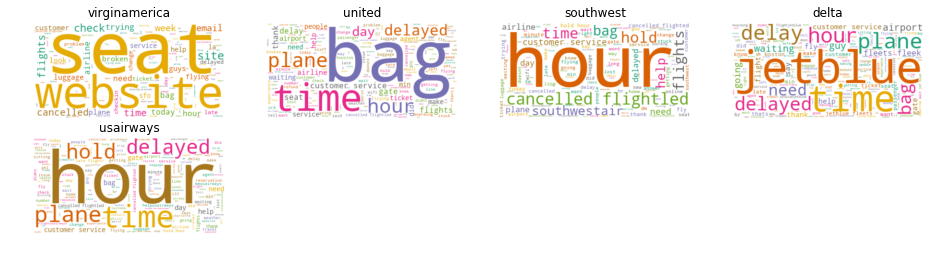

In [150]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

airline_name = ['virginamerica', 'united', 'southwest', 'delta', 'usairways']

print(df_clean)
print(data.columns)

# Create subplots for each comedian
for index, c in enumerate(data.columns):
    wc.generate(df_clean.reviews[c])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(airline_name[index])
    
plt.show()

# Append dataframe and Drop rows in dataframe

In [151]:
import pandas as pd

df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

df = df.append(df2)
print(df)

# Drop rows with label 0
df = df.drop(0)
df

   a  b
0  1  2
1  3  4
0  5  6
1  7  8


,a,b
1,3,4
1,7,8
